# importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(101)

In [3]:
data=pd.read_csv("titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dic_lives = {0: 'died', 1: 'live'}

dic_sex={'male':0,
        'female':1}
data['Sex']=data['Sex'].apply(lambda x:dic_sex[x])

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [7]:
features = data.iloc[:, [1, 4]]
features

,Survived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [8]:
label=data['Sex']
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

# splitting the data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,label,test_size=0.3,random_state=0)

# Multilayer perceptron 

activation function

sigmoid

In [10]:
def sigmoid(x, derivative=False):
    if derivative == True:
        f = (1 / (1 + np.exp(-x))) * (1 / (1 - np.exp(-x)))  
    else:
        f = 1 / (1 + np.exp(-x))
    return f

In [11]:
def ReLu(x,derivative=False):
    if derivative==True:
        f=np.heaviside(x,1)  
    else:
        f=np.maximum(x,0)
    return f        
             

# training model

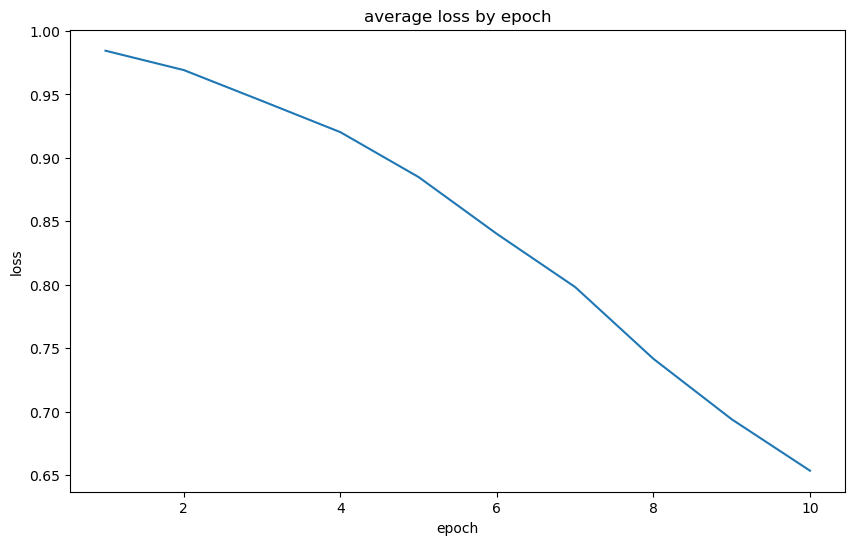

In [12]:
def train_ANN(X_train,Y_train,h1_units=4,h2_units=4,learning_rate=0.001):
    random.seed(101)
    #hidden layer1
    w1=np.random.rand(h1_units,X_train.shape[1])
    b1=np.random.rand(h1_units)
    #hidden layer2
    w2=np.random.rand(h2_units,h1_units)
    b2=np.random.rand(h2_units)
    #output layer
    out_layer=np.random.rand(h2_units)
    b0=np.random.rand(1)
    loss=[]
    Y_pre=[]
    for i in range(0,X_train.shape[0]):  
        X_data=X_train.iloc[i]  
        
        # feedforward 
        h1=ReLu(np.dot(w1,X_data)+b1)
        h2=ReLu(np.dot(w2,h1)+b2)
        y=sigmoid(np.dot(out_layer,h2)+b0)
        # backward
        delta_out=(y-Y_train.iloc[i])*sigmoid(y,derivative=True)  
        delta_2=delta_out*out_layer*ReLu(h2,derivative=True)
        delta_1=np.dot(delta_2,w2)*ReLu(h1,derivative=True)
        # gradient descent
        out_layer=out_layer-learning_rate*delta_out*h2 #outer_layer
        b0=b0-learning_rate*delta_out
        
        #hidden layer2
        w2=w2-learning_rate*np.outer(delta_2,h1)  #  weight update
        b2=b2-learning_rate*delta_2
        #hidden layer1
        w1=w1-learning_rate*np.outer(delta_1,X_data)  # weight update
        b1=b1-learning_rate*delta_1
        #cost
        loss.append(1/2*(y-Y_train.iloc[i])**2)  #  Loss calculation 
        Y_pre.append(y[0])
        
    batch_loss=[]
    for i in range(0,10):  #  this loop should be outside the main loop
        loss_avg=0
        for m in range(0,60):
            loss_avg+=Y_pre[60*i+m]/60
        batch_loss.append(loss_avg)
        
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title("average loss by epoch")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()
    
    return w1,w2,out_layer,b0,b1,b2,loss        

w1,w2,out_layer,b0,b1,b2,loss=train_ANN(X_train,Y_train)

        
    

In [13]:
def pred_ANN(X_test, w1, w2, out_layer, b0, b1, b2):
    pred = []
    for i in range(X_test.shape[0]):
        x = X_test.iloc[i].values  # Convert x to NumPy array
        z1 = ReLu(np.dot(w1, x) + b1)
        z2 = ReLu(np.dot(w2, z1) + b2)
        y = sigmoid(np.dot(out_layer, z2) + b0)
        pred.append(np.heaviside(y-0.5,1)[0])
    return np.array(pred)



In [14]:
prediction = pred_ANN(X_test,w1, w2, out_layer, b0, b1, b2)
prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(Y_test,prediction)
cm

array([[  0, 169],
       [  0,  99]], dtype=int64)

In [16]:
dic_lives = {0: 'died', 1: 'live'}

df_cm = pd.DataFrame(cm, index=[dic_lives[i] for i in range(2)], columns=[dic_lives[i] for i in range(2)])
df_cm

,died,live
died,0,169
live,0,99


# model evaluation 

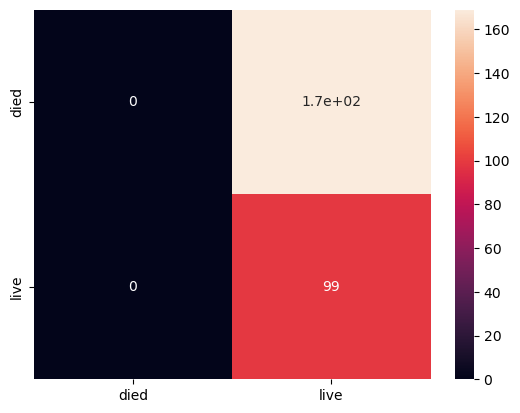

In [19]:
sns.heatmap(df_cm,annot=True)
plt.show()

<Axes: >

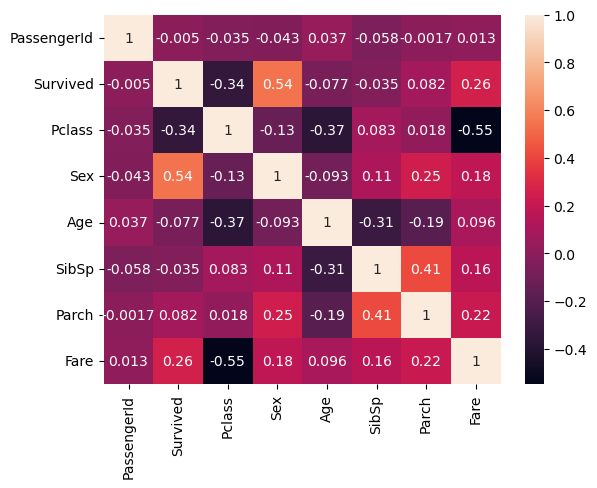

In [22]:
sns.heatmap(data.corr(),annot=True)
